In [1]:
!pip install shap

     |████████████████████████████████| 358kB 8.3MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491628 sha256=06b3428da66924fb3c8561b2a4233af74ba6b36a1e70909f981c9524df8badd9
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [2]:
import shap
import xgboost

In [4]:
import numpy as np
import pandas as pd
houses=pd.read_csv("https://raw.githubusercontent.com/ProfLuciano/cd/gh-pages/data/recife.csv",encoding = "ISO-8859-1")
houses = houses[houses['price'] > 30000]
houses.head()
#houses['price_m2'] = houses['price']/houses['area']

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart
5,320000,-8.026516,-34.917791,2.0,50.0,1.0,2.0,1.0,Casa Amarela,Recife,Recife,Pernambuco,apart


In [5]:
houses = houses.drop(columns=['suburb','city','state','district'])
houses['type'] = houses['type'].astype('category')
houses['type'] = houses['type'].cat.codes

In [6]:
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,type
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,0
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,0
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,0
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,0
5,320000,-8.026516,-34.917791,2.0,50.0,1.0,2.0,1.0,0


In [7]:
X = houses.iloc[:,1:].values

In [8]:
y = houses.iloc[:,0].values

In [9]:
model = xgboost.XGBRegressor().fit(X, y)

[12:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


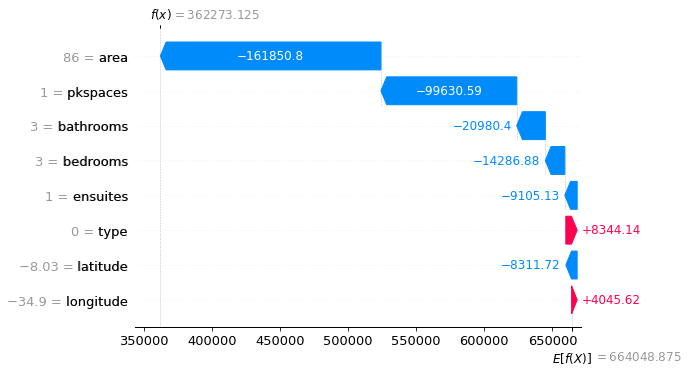

In [10]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.waterfall_plot(shap.Explanation(feature_names=houses.columns[1:],values=shap_values[0]))

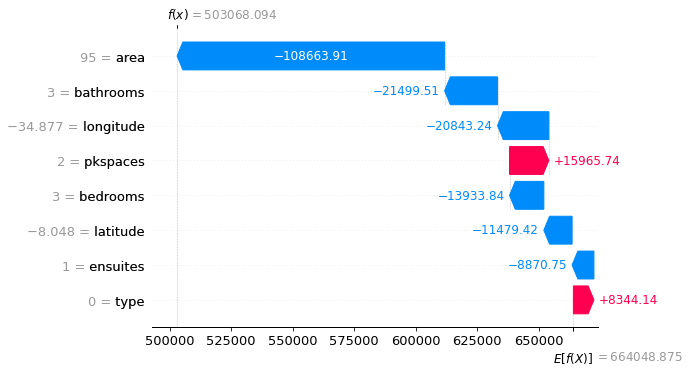

In [11]:
shap.waterfall_plot(shap.Explanation(feature_names=houses.columns[1:],values=shap_values[2]))

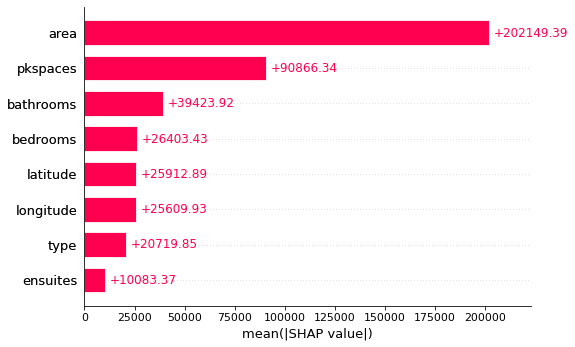

In [20]:
shap.plots.bar(shap.Explanation(feature_names=houses.columns[1:],values=shap_values))